In [ ]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from math import sqrt
from statsmodels.stats.weightstats import ztest as ztest

**EXERCISE 1.** The hourly wages in a particular industry are normally distributed with mean \$13.20 and standard deviation \$2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)bold text

In [ ]:
x_bar = 12.20
n = 40
sigma = 2.5
mu = 13.20

In [ ]:
z = (x_bar - mu)/(sigma/sqrt(n))
z

-2.5298221281347035

In [ ]:
p_value = stats.norm.cdf(-2.53)
p_value

0.005703126332950699

In [ ]:
alpha = 0.01

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
    print('We can accuse the company for paying substandard wages.')
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.
We can accuse the company for paying substandard wages.


**EXERCISE 2.** Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

In [ ]:
df = pd.read_csv("soil.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [ ]:
df.describe()

,Soil1,Soil2
count,30.000000,35.000000
mean,1.691800,1.417114
std,0.206903,0.219184
min,1.110000,1.053000
25%,1.572000,1.231000
50%,1.675000,1.379000
75%,1.865250,1.559000
max,2.054000,1.878000


In [ ]:
indtest = stats.ttest_ind(df["Soil1"], df["Soil2"], equal_var=True, nan_policy="omit")
indtest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

In [ ]:
alpha = 0.01

if indtest.pvalue < alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
    print('Yes, the soils appear to differ with respect to average shear strength')
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))
    print('No, the soils appear to differ with respect to average shear strength')


At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.
Yes, the soils appear to differ with respect to average shear strength


**EXERCISE 3.** The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats. 

1. Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
2. Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [ ]:
df2 = pd.read_csv("2015_PISA.csv")
df2.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [ ]:
df2.groupby("Continent_Code").describe()

internet_users_per_100                                   \
                                count       mean        std        min   
Continent_Code                                                           
AF                                2.0  43.359918   7.297226  38.200000   
AS                               17.0  68.455613  21.086060  21.976068   
EU                               37.0  77.274888  12.425773  53.744979   
OC                                2.0  86.391704   2.589686  84.560519   
SA                                7.0  60.180494   9.772455  40.900000   

                                                            Math              \
                      25%        50%        75%        max count        mean   
Continent_Code                                                                 
AF              40.779959  43.359918  45.939877  48.519836   2.0  363.212100   
AS              50.300000  74.000000  84.948353  92.884826  17.0  466.216647   
EU              68.632900  76.184000  87.479056  98.200000  37.0  477.981449   
OC              85.476112  86.391704  87.307296  88.222889   2.0  494.559750   
SA              57.116462  64.289000  66.321532  69.198471   7.0  402.887700   

                ...     Reading           Science                         \
                ...         75%       max   count        mean        std   
Continent_Code  ...                                                        
AF              ...  358.256450  361.0555     2.0  381.074250   7.536556   
AS              ...  508.690500  535.1002    17.0  467.945847  56.671371   
EU              ...  499.814600  526.4247    37.0  478.299381  34.450616   
OC              ...  507.678175  509.2707     2.0  511.648700   2.340241   
SA              ...  431.922700  458.5709     7.0  421.747186  18.470319   

                                                                       
                     min         25%        50%         75%       max  
Continent_Code                                                         
AF              375.7451  378.409675  381.07425  383.738825  386.4034  
AS              386.4854  417.611200  456.48360  523.277400  555.5747  
EU              383.6824  460.774900  490.22500  501.936900  534.1937  
OC              509.9939  510.821300  511.64870  512.476100  513.3035  
SA              396.6836  408.205450  424.59050  433.794600  446.9561  

[5 rows x 32 columns]

In [ ]:
df2['Continent_Code'].value_counts()

EU    37
AS    17
SA     7
OC     2
AF     2
Name: Continent_Code, dtype: int64

In [ ]:
df2[df2["Continent_Code"] == "EU"]["Math"]

37

In [ ]:
eu_math = df2[df2["Continent_Code"] == "EU"]["Math"]
as_math = df2[df2["Continent_Code"] == "AS"]["Math"]

indtest_2 = stats.ttest_ind(eu_math, as_math, equal_var=True, nan_policy="omit")
indtest_2

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [ ]:
alpha_2 = 0.05

if indtest_2.pvalue < alpha_2:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha_2))
    print('Yes, there is difference (on the average) for the math scores among European (EU) and Asian (AS) countries')
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha_2))
    print('No, there is no difference (on the average) for the math scores among European (EU) and Asian (AS) countries')

At 0.05 level of significance, we fail to reject the null hypothesis.
No, there is no difference (on the average) for the math scores among European (EU) and Asian (AS) countries


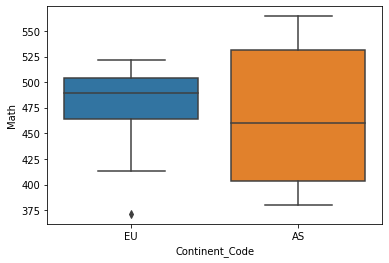

In [ ]:
sns.boxplot(x="Continent_Code", y="Math", order=["EU", "AS"], data=df2);

**EXERCISE 4.**  A gym operator organized a 2-month exercise and diet program for 15 customers suffering from their excess weight. To evaluate whether this diet program was effective, he measured the customers' starting and ending weights and recorded them in the computer. Did the exercise and diet program have an impact on customers' weight loss? Use an α = .01 level test.

In [ ]:
df3 = pd.read_csv("weight.csv")

In [ ]:
df3 = df3.iloc[0:15][["starting", "ending"]]

In [ ]:
df3

,starting,ending
0,76.0,72.0
1,81.0,82.0
2,86.0,84.0
3,71.0,71.0
4,88.0,83.0
5,78.0,74.0
6,76.0,70.0
7,81.0,80.0
8,79.0,78.0
9,77.0,79.0


In [ ]:
reltest = stats.ttest_rel(df3["starting"], df3["ending"])
reltest

Ttest_relResult(statistic=2.6780834840499255, pvalue=0.01801293035013252)

In [ ]:
alpha_3 = 0.01

if indtest_2.pvalue < alpha_3:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha_3))
    print('Yes, diet program has a significant impact on customers\' weight loss')
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha_3))
    print('No, diet program does not have a significant impact on customers\' weight loss')

At 0.01 level of significance, we fail to reject the null hypothesis.
No, diet program does not have a significant impact on customers' weight loss
